**Name: Christ-Brian Amedjonekou**  
**Date: 03/12/2019**  
**PHYS 3600ID-D862 (Machine Learning) HW 3**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**


***I certify that my work is my own.***

1\. (not a coding exercise). You have a data set that contains cars, motorcycles, bikes, and tricycles. Your features are weight and number of wheels. How could you build an optimal decision tree classifier? Describe the splits and the value at which you would split the features.

* I would start with weight as the first split. 
    * Reason 1: Because motor vehicles will be heavier than bikes and tricycles. 
    * Reason 2: Bikes and Motorcycles have the same amount of wheels but different weights. 
    * **Split Question: "Weight: $\mathbf{x > 100} \textbf{ lbs}$"**
    * **Goal: Seperate motor vehicles from bikes/tricycles**


* Then, I'd create a split differentiating 2-wheel vehicle types from others:
    *  **Split Question: "Wheels: $\mathbf{x > 2} \textbf{ wheels}$"**

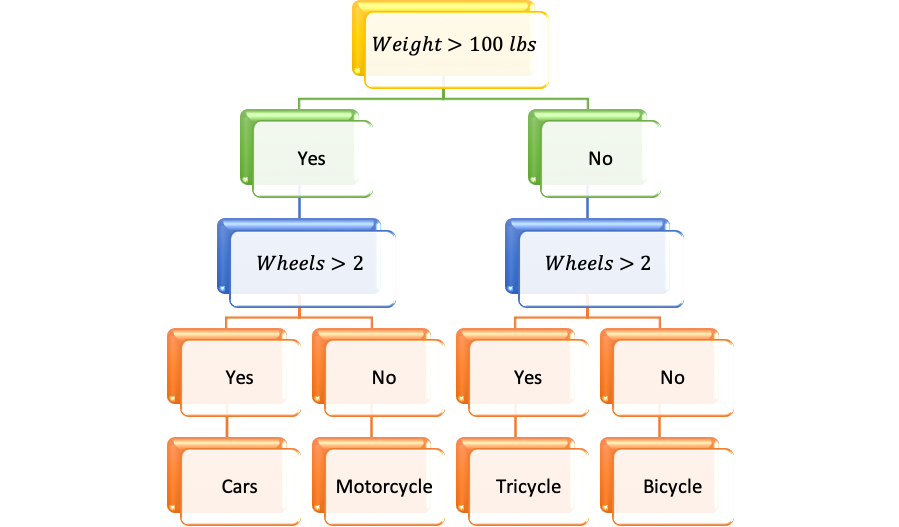

In [1]:
# Don't Run Cell
from IPython.display import Image as I
I(filename= '/Users/Chris/Desktop/Images/ML1.png', width= 500, height= 500)

We will now work with the digits data set and do something similar to what we did with Iris.
We want to "teach" the machine how the different digits look like so that the system can correctly classify new examples of hand-written digits.

### Imports

In [2]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cfm
import itertools as itr
import numpy as np

### Functions

In [3]:
#This is just a function that plots them
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itr.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
digits = datasets.load_digits()

2\. Create numpy arrays containing the features and target values for this data set.

In [5]:
Target = digits.target
Image = digits.images
Data = digits.data

3\. How many objects are in this data set? How many features? 

[More Info about the Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

* **Based on the 'DESCR', there are 5620 instances w/ 64 Attributes/Features. For the Image array the feature seems to be a $8\times8$ Matrix of it's own (must represent the image of the digit). However, the Target Array, and Image Array (from the 'images' dictionary key) have 1797 Rows (so Instances/Objects)**


* The Data array also has 1797 rows, there's also 64 Features.


* **Through further digging, provided by the *'More Info about the Dataset'* link above, I was able to confirm that there are in fact 1797 rows (objects), and 64 Columns (features).**

***Excerpt***

*"This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64."*

In [6]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels

In [7]:
Image.shape

(1797, 8, 8)

**The Data array is the Image array, however, the Data Array flattens the $8\times8$ matrix so that it becomes the Features Vector**

In [8]:
Data.shape

(1797, 64)

4\. How many possible target values do you have? 

In [9]:
Target.size

1797

5\. Is the data set balanced or imbalanced? Justify your answer.

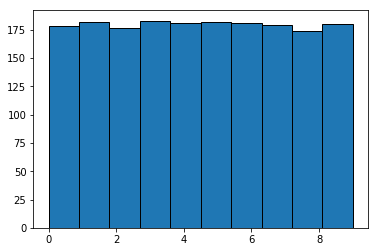

In [10]:
plt.hist(Target, edgecolor= 'k');

**Answer: Balanced because the uniques elements of the Target array have approx the same amount of members**

6\. The values that you see for the features of this data set are the brightness, on a scale of 0 to 1, of each of the pixels in the image. The following code plots the first 100 objects. Just based on what you see, what digits do you think would be easier for an algorithm to classify correctly and why?

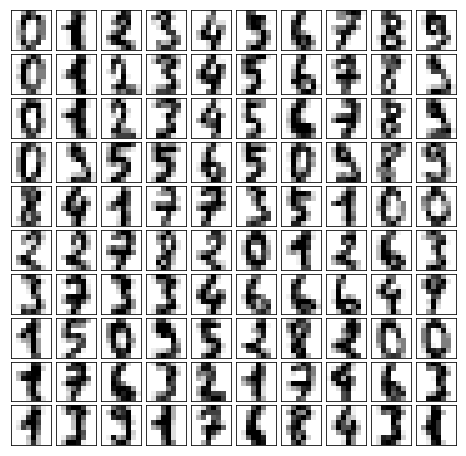

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')


* **The number 1 because for the most part the dark and light pixels are pretty concentrated and distinct (seperated). I'd add 0, and 2 for the same reason.**

7\. Following what we did for the Iris data set, create a train/test split of this data set with 70% of the data in the training set and 30% of the data in the test set. Fit a decision tree classifier with default values to the training set, and predict the target values for the test set.

In [12]:
# Creates the Model
digitsModel = DTC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets
xtrain, xtest, ytrain, ytest = TTS(Data, Target, test_size= 0.3, 
                                   train_size= 0.7, random_state= 5)

# Now we'll fit the model with the training data
digitsModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = digitsModel.predict(xtest)

8\. Report the accuracy score. Based on your answer to Q5, is accuracy a meaningful scorer for this data set?

* It's meaningful since we do not have an unbalanced dataset

In [13]:
acc(ytest, ypred)

0.8425925925925926

9\. Repeat the steps 7-8 using a 50/50 train/test split, and a 85/15 train/test split. What happens to the accuracy? Would you expect the accuracy to go up or down as your training set becomes larger?

In [14]:
# Creates the Model
digitsModel = DTC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets
xtrain, xtest, ytrain, ytest = TTS(Data, Target, test_size= 0.5, random_state= 5)

# Now we'll fit the model with the training data
digitsModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = digitsModel.predict(xtest)

In [15]:
# Finds the Accuracy of the Decision Tree
acc(ytest, ypred)

0.864293659621802

10\. Repeat the procedure with the 80/20 train/test split, but setting five different values of the random seed (parameter "random_state" in the train_test_split function). Record and report the five accuracy scores and their standard deviation.

In [16]:
# Creates the Model
digitsModel = DTC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets
xtrain, xtest, ytrain, ytest = TTS(Data, Target, test_size= 0.2, random_state= 5)

# Now we'll fit the model with the training data
digitsModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = digitsModel.predict(xtest)

In [17]:
# Finds the Accuracy of the Decision Tree
acc(ytest, ypred)

0.85

11\. Report and plot the confusion matrix for this example (note: the labels are the class *names*). Which digit(s) is (are) most often classified incorrectly? 

* **Based on the Confusion Matrix:**

    * Number 1
    * Number 3
    * Number 4

Confusion matrix, without normalization
[[31  0  0  0  0  1  1  0  2  0]
 [ 0 28  3  1  1  0  0  0  2  0]
 [ 0  3 27  1  0  1  1  1  2  0]
 [ 0  0  2 31  1  0  0  1  0  2]
 [ 0  3  0  0 24  1  0  2  0  2]
 [ 1  1  0  1  0 37  1  0  1  4]
 [ 0  2  0  0  1  0 27  0  0  0]
 [ 1  0  0  0  1  0  0 40  0  0]
 [ 0  1  2  1  0  1  0  0 32  1]
 [ 0  0  0  0  0  0  0  0  0 29]]


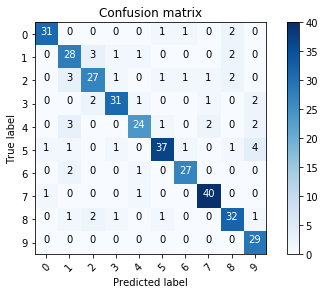

In [18]:
# Computes the confusion matrix
confuse_mtrx = cfm(ytest, ypred)
np.set_printoptions(precision=2)

# Creates a figure
plt.figure()

# Plots the non-normalized confusion matrix
plot_confusion_matrix(confuse_mtrx, classes=digits.target_names,
                      title='Confusion matrix')

12\. With reference to the question above: why do you think this is the case?

* **In general, people have weird/unique handwriting, particularly with certain numbers/letters**
* **Specifically to the problem, the digits that didn't have clear images were the ones mistakes occurred**
* **Also, based upon my aforementioned hypothesis, pixels for certain numbers where not distinct enough to distinguish the handwritten marks from white space.**

13\. (Extra Credit) Play with different parameters in the Decision Tree Classifier to see if you can increase the accuracy.

In [19]:
# Creates the Model
digitsModel = DTC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets
xtrain, xtest, ytrain, ytest = TTS(Data, Target, test_size= 0.1, random_state= 1)

# Now we'll fit the model with the training data
digitsModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = digitsModel.predict(xtest)

In [20]:
# Finds the Accuracy of the Decision Tree
acc(ytest, ypred)

0.8666666666666667